¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El propósito principal de este análisis es determinar cual tarifa del plan de llamadas genera más ingresos a la empresa Megaline.
Para esto se analizará el comportamiento de consumo de los usuarios tanto de la tarifa surf como ultimate, basado en sus consumos mensuales.
Finalmente mediante pruebas estadísticas, generando pruebas de hipótesis se determinará que plan genera más ingresos.


## Inicialización

In [2]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt



## Cargar datos

In [3]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")
users = pd.read_csv("/datasets/megaline_users.csv")


## Preparar los datos

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas

plans.tail()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


El detalle de consumos de los datos nos indican las cantidad de MB consumidos durante cada mes, pero el plan indica que los MB adicionales se cobrarán por GB, por tanto, más adelante deberá llevarse estos datos a una misma unidad de medida, en este caso GB para calcular la cantidad que los usuarios pagan en sus facturas. 

## Corregir datos

Se corrige la unidad de medida más adelante en esta sección

## Enriquecer los datos

En esta sección deberán transformarse los consumos de internet que se encuentran en MB a GB para posteriormente calcular los ingresos generados por este servicio.

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

<div class="alert alert-block alert-info">
<b>Se comenta según las observaciones del revisor sobre la transformación de datos de MB a GB.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con los ajustes!
</div>

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Se puede observar que existen tipos de datos que se pueden mejorar.

"user_id", no requiere ser tipo entero ya que no se ejecutarán operaciones con estos valores, por lo tanto se deberán cambiar a un tipo "object".

Los campos de fechas, como "reg_date" y "churn_date", se transformarán a un tipo date para poder manipular esta información más adelante.

### Corregir los datos

In [8]:
users["user_id"] = users["user_id"].astype(str) #cambia a string al columna "user_id"
users["reg_date"] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users["churn_date"] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Para hacer la transformación de reg_date a un datatime puedes hacer uso de la siguiente función:
    
    pd.to_datetime(user['reg_date'], format='%Y-%m-%d')
    
te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas. Los mismo para las otras variables que son fechas de otras bases de datos.
</div>

<div class="alert alert-block alert-info">
<b>Se corrigen los formatos de fechas, siguiendo las recomendaciones del revisor.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con los ajustes!
</div>

### Enriquecer los datos

No se requiere información adicional en está sección

## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Imprime una muestra de datos para las llamadas

calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


El campo "id" es general y se repite en los distintos datasets, lo cual podría confundir ya que de acuerdo al dataset, la información contenida será distinta, se deberá renombrar para que tenga congruencia con el dataset al que corresponda.

El campo de "user_id" también deberá cambiar su tipo a un string ya que no se realizarán operaciones aritméticas.

### Corregir los datos

In [11]:
calls["user_id"] = calls["user_id"].astype(str) #transforma a tipo de datos string
calls["call_date"] = pd.to_datetime(calls["call_date"], format='%Y-%m-%d') #transforma tipo de datos a datetime
calls = calls.rename(columns = {"id":"calls_id"}) #renombra columna "id"
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   calls_id   137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

<div class="alert alert-block alert-info">
<b>Se corrigen los formatos de fechas, siguiendo las recomendaciones del revisor.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con los ajustes!
</div>

### Enriquecer los datos

In [12]:
#añade una nueva columna con información del mes de llamada y cambia a formato datatime
calls["month"] = calls["call_date"].dt.to_period("M").dt.start_time
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   calls_id   137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 5.3+ MB


,calls_id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,2018-12-01
1,1000_145,1000,2018-12-27,13.66,2018-12-01
2,1000_247,1000,2018-12-27,14.48,2018-12-01
3,1000_309,1000,2018-12-28,5.76,2018-12-01
4,1000_380,1000,2018-12-30,4.22,2018-12-01


## Mensajes

In [13]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Imprime una muestra de datos para los mensajes

messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Al igual que los anteriores datasets, se debe renombrar el campo "id" y cambiar el tipo de "user_id" por tipo object.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [15]:
messages["user_id"] = messages["user_id"].astype(str) #transforma a tipo de datos string
messages["message_date"] = pd.to_datetime(messages["message_date"]) #transforma tipo de datos a datetime
messages = messages.rename(columns = {"id":"messages_id"}) #renombra el campo "id"
messages

,messages_id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


### Enriquecer los datos

In [16]:
#añade la columna "month" y transforma la columna a un tipo datatime
messages["month"] = messages["message_date"].dt.to_period("M").dt.start_time
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   messages_id   76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 2.3+ MB


,messages_id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12-01
1,1000_160,1000,2018-12-31,2018-12-01
2,1000_223,1000,2018-12-31,2018-12-01
3,1000_251,1000,2018-12-27,2018-12-01
4,1000_255,1000,2018-12-26,2018-12-01


## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Imprime una muestra de datos para el tráfico de internet

internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Los campos "id" y "user_id" también deberá corregirse para las secciones siguientes donde se necesitará claridad de que información contiene cada columna para usarla en nuestra análisis.

### Corregir los datos

In [19]:
internet["user_id"] = internet["user_id"].astype(str) #transforma a tipo de datos string
internet["session_date"] = pd.to_datetime(internet["session_date"]) #transforma tipo de datos a datetime
internet = internet.rename(columns = {"id":"session_id"}) #renombra la columna "id"
internet

,session_id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [20]:
#añade la columna "month" y transforma la columna a un tipo datatime
internet["month"] = internet["session_date"].dt.to_period("M").dt.start_time
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   session_id    104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 4.0+ MB


,session_id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,2018-12-01
1,1000_204,1000,2018-12-31,0.00,2018-12-01
2,1000_379,1000,2018-12-28,660.40,2018-12-01
3,1000_413,1000,2018-12-26,270.99,2018-12-01
4,1000_442,1000,2018-12-27,880.22,2018-12-01


Este dataset tiene algo particular, ya que al agrupar los datos, tendremos que redondear hacia arriba los valores de la transformación de MB a GB, dado que el cobro estra se lo realiza cuando el usuario pasa los límites en GB.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

<div class="alert alert-block alert-info">
<b>Se comenta la sección de acuerdo con las recomendaciones del revisor.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con los ajustes!
</div>

## Estudiar las condiciones de las tarifas

In [21]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario



In [22]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

user_calls = calls.groupby(["user_id","month"])["duration"].count()
user_calls

user_id  month     
1000     2018-12-01    16
1001     2018-08-01    27
         2018-09-01    49
         2018-10-01    65
         2018-11-01    64
                       ..
1498     2018-12-01    39
1499     2018-09-01    41
         2018-10-01    53
         2018-11-01    45
         2018-12-01    65
Name: duration, Length: 2258, dtype: int64

<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

<div class="alert alert-block alert-info">
<b>Por esta ocasión se mantendrán los datos agrupados y se tomará en consideración las recomendaciones del revisor para futuros proyectos.</b> <a class="tocSkip"></a>

In [23]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

user_minutes = calls.groupby(["user_id","month"])["duration"].sum()
user_minutes.head()

user_id  month     
1000     2018-12-01    116.83
1001     2018-08-01    171.14
         2018-09-01    297.69
         2018-10-01    374.11
         2018-11-01    404.59
Name: duration, dtype: float64

In [24]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

user_messages = messages.groupby(["user_id","month"])["messages_id"].count()
user_messages

user_id  month     
1000     2018-12-01    11
1001     2018-08-01    30
         2018-09-01    44
         2018-10-01    53
         2018-11-01    36
                       ..
1496     2018-09-01    21
         2018-10-01    18
         2018-11-01    13
         2018-12-01    11
1497     2018-12-01    50
Name: messages_id, Length: 1806, dtype: int64

In [25]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

mb_per_user = internet.groupby(["user_id","month"])["mb_used"].sum()
mb_per_user


user_id  month     
1000     2018-12-01     1901.47
1001     2018-08-01     6919.15
         2018-09-01    13314.82
         2018-10-01    22330.49
         2018-11-01    18504.30
                         ...   
1498     2018-12-01    23137.69
1499     2018-09-01    12984.76
         2018-10-01    19492.43
         2018-11-01    16813.83
         2018-12-01    22059.21
Name: mb_used, Length: 2277, dtype: float64

In [26]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

bill_users = pd.concat([user_minutes,user_messages,mb_per_user],axis = "columns").rename(columns = {"messages_id":"messages_used", "duration":"minutes_used"}).reset_index()
bill_users

,user_id,month,minutes_used,messages_used,mb_used
0,1000,2018-12-01,116.83,11.0,1901.47
1,1001,2018-08-01,171.14,30.0,6919.15
2,1001,2018-09-01,297.69,44.0,13314.82
3,1001,2018-10-01,374.11,53.0,22330.49
4,1001,2018-11-01,404.59,36.0,18504.30
...,...,...,...,...,...
2288,1498,2018-12-01,324.77,NaN,23137.69
2289,1499,2018-09-01,330.37,NaN,12984.76
2290,1499,2018-10-01,363.28,NaN,19492.43
2291,1499,2018-11-01,288.56,NaN,16813.83


In [27]:
# Añade la información de la tarifa
plans = plans.rename(columns = {"plan_name":"plan"})
user_plan = users[["user_id","plan"]]
user_plan_fare = user_plan.merge(plans, on = "plan", how = "outer")
user_bill_plan = bill_users.merge(user_plan_fare, on = "user_id", how = "outer")
user_bill_plan

,user_id,month,minutes_used,messages_used,mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,2018-12-01,116.83,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,2018-08-01,171.14,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03
2,1001,2018-09-01,297.69,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03
3,1001,2018-10-01,374.11,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03
4,1001,2018-11-01,404.59,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,NaT,NaN,NaN,NaN,surf,50,15360,500,20,10,0.03,0.03
2299,1307,NaT,NaN,NaN,NaN,surf,50,15360,500,20,10,0.03,0.03
2300,1319,NaT,NaN,NaN,NaN,surf,50,15360,500,20,10,0.03,0.03
2301,1378,NaT,NaN,NaN,NaN,surf,50,15360,500,20,10,0.03,0.03


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [28]:
# Calcula el ingreso mensual para cada usuario por cada servicio
user_bill_plan["extra_minutes"] = (user_bill_plan["minutes_used"] - user_bill_plan["minutes_included"]).fillna(0) 
user_bill_plan["extra_messages"] = (user_bill_plan["messages_used"] - user_bill_plan["messages_included"]).fillna(0)
user_bill_plan["extra_mb"] = (user_bill_plan["mb_used"] - user_bill_plan["mb_per_month_included"]).fillna(0)
#Filtra las columnas necesarias para el siguiente análisis
user_bill_services = user_bill_plan[["user_id","month","plan","extra_minutes","extra_messages","extra_mb","usd_monthly_pay","usd_per_gb","usd_per_message","usd_per_minute"]]
bill_users = user_bill_services.copy() #crea una copia para evitar dañar el conjunto de datos original

#Reemplaza los valores negativos de los consumos excedentes por ceros
bill_users.loc[bill_users["extra_minutes"] < 0, "extra_minutes"] = 0
bill_users.loc[bill_users["extra_messages"] < 0, "extra_messages"] = 0
bill_users.loc[bill_users["extra_mb"] < 0, "extra_mb"] = 0
bill_users

#Facturación por usuario por mes
#Redeondea hacia arriba los consumos realizados por servicios
bill_users["minutes_bill"] = np.ceil(bill_users["extra_minutes"]*bill_users["usd_per_minute"])
bill_users["messages_bill"] = bill_users["extra_messages"]*bill_users["usd_per_message"]
bill_users["gb_bill"] = np.ceil(bill_users["extra_mb"]/1024)*bill_users["usd_per_gb"] #transforma MB a GB
#Genera nueva columna con los consumos totales por usuario y por mes
bill_users["total_bill"] = bill_users["minutes_bill"] + bill_users["messages_bill"] + bill_users["gb_bill"] + bill_users["usd_monthly_pay"]
total_users_bill = bill_users[["user_id","month","plan","total_bill"]]
total_users_bill


,user_id,month,plan,total_bill
0,1000,2018-12-01,ultimate,70.00
1,1001,2018-08-01,surf,20.00
2,1001,2018-09-01,surf,20.00
3,1001,2018-10-01,surf,90.09
4,1001,2018-11-01,surf,60.00
...,...,...,...,...
2298,1143,NaT,surf,20.00
2299,1307,NaT,surf,20.00
2300,1319,NaT,surf,20.00
2301,1378,NaT,surf,20.00


## Estudia el comportamiento de usuario

### Llamadas

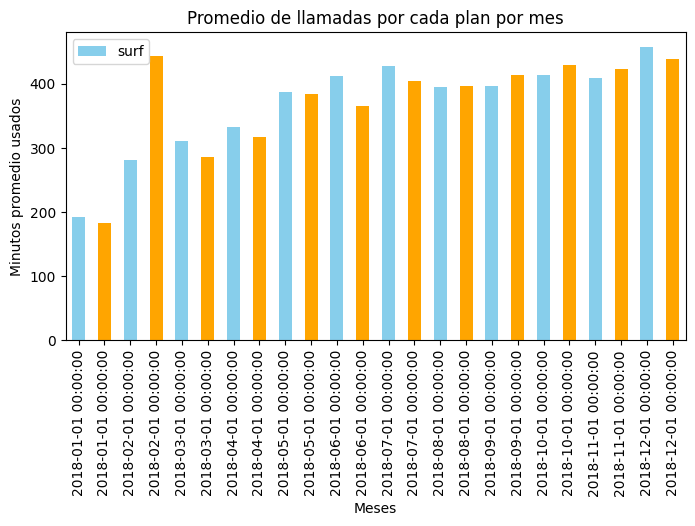

In [29]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Filtrar los datos por plan
calls_avg = user_bill_plan.groupby(['month',"plan"])["minutes_used"].mean().reset_index()

# Graficar las opciones en un gráfico de barras
calls_avg.plot.bar(x="month", y="minutes_used", color=["skyblue", "orange"], figsize = (8,4))
plt.legend(["surf","ultimate"])
plt.xlabel("Meses")
plt.ylabel("Minutos promedio usados")
plt.title("Promedio de llamadas por cada plan por mes")
plt.show()



Text(0.5, 1.0, 'Promedio de llamadas por cada plan y por mes')

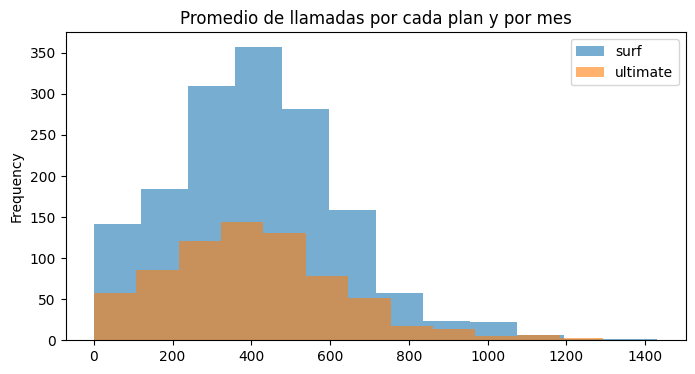

In [30]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
#Filtra los consumos de llamadas por tipo de plan
surf_data = user_bill_plan[user_bill_plan["plan"] == "surf"]["minutes_used"]
ultimate_data = user_bill_plan[user_bill_plan["plan"] == "ultimate"]["minutes_used"]

# Crear el gráfico
plt.figure(figsize = (8,4))
surf_data.plot(kind = "hist", bins = 12, alpha = 0.6)
ultimate_data.plot(kind = "hist", bins = 12, alpha = 0.6)
plt.legend(["surf","ultimate"])
plt.title("Promedio de llamadas por cada plan y por mes")


In [31]:
# Calcula la media y la varianza de la duración mensual de llamadas.

surf_call_mean = surf_data.mean()
print(f"La media del plan surf es: {surf_call_mean}")
print()
ultimate_call_mean = ultimate_data.mean()
print(f"La media del plan ultimate es: {ultimate_call_mean}")
print()
#Cálculo de la varianza

print(f"La varianza del plan surf es: {np.var(surf_data)}")
print()
print(f"La varianza del plan ultimate es: {np.var(ultimate_data)}")

La media del plan surf es: 412.0978899676375

La media del plan ultimate es: 410.18095371669

La varianza del plan surf es: 46970.83270700408

La varianza del plan ultimate es: 50439.789304279766


#Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas



Text(0.5, 1.0, 'Diagrama de caja de la distribución mensual de llamadas del plan surf')

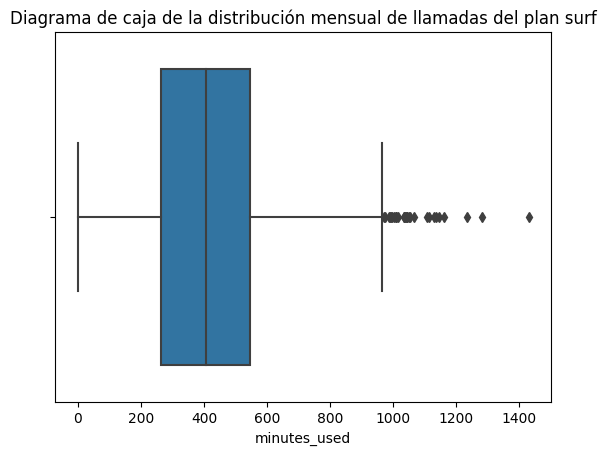

In [32]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

sns.boxplot(surf_data).set_title("Diagrama de caja de la distribución mensual de llamadas del plan surf")



Text(0.5, 1.0, 'Diagrama de caja de la distribución mensual de llamadas del plan ultimate')

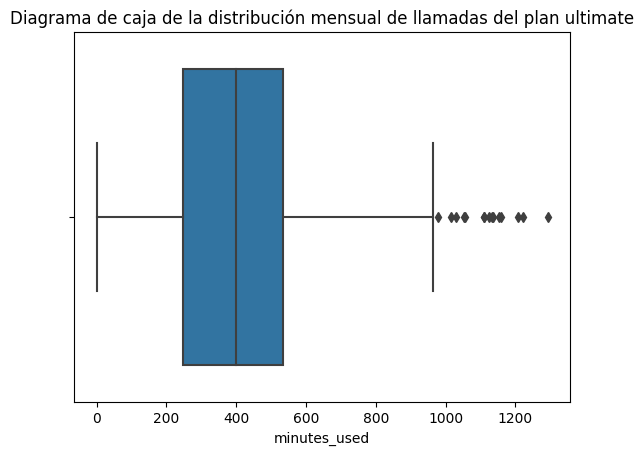

In [33]:
#Diagrama de caja para el plan ultimate

sns.boxplot(ultimate_data).set_title("Diagrama de caja de la distribución mensual de llamadas del plan ultimate")


Las llamadas promedio de los ususarios del plan surf y ultimate son bastante parecidas, no se puede concluir nada en concreto hasta terminar el análisis

### Mensajes

In [34]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
#Agrupa cantidad de mensajes por tipo de plan y mes
sms_plan = user_bill_plan.groupby(["month","plan"])["messages_used"].mean().reset_index()
sms_plan


,month,plan,messages_used
0,2018-01-01,surf,21.000000
1,2018-01-01,ultimate,20.666667
2,2018-02-01,surf,21.600000
3,2018-02-01,ultimate,25.166667
4,2018-03-01,surf,21.937500
5,2018-03-01,ultimate,34.714286
6,2018-04-01,surf,24.166667
7,2018-04-01,ultimate,28.937500
8,2018-05-01,surf,33.017857
9,2018-05-01,ultimate,44.333333


In [35]:
#Ingresos por mensajes adicionales del plan surf
bill_sms_surf = bill_users[bill_users["plan"] == "surf"]["messages_bill"].sum()
print(f"El ingreso promedio por clientes con plan surf es: ${bill_sms_surf}")


El ingreso promedio por clientes con plan surf es: $330.92999999999995


In [36]:
#Ingresos por mensajes adicionales del plan ultimate
bill_sms_ultimate = bill_users[bill_users["plan"] == "ultimate"]["messages_bill"].sum()
print(f"El ingreso promedio por clientes con plan ultimate es: ${bill_sms_ultimate}")

El ingreso promedio por clientes con plan ultimate es: $0.0


En general los usuarios que poseen el plan ultimate, consumen mayor cantidad de mensajes mensualmente.

El plan ultimate incluyen 1000 SMS y los usuarios no generan adicionales ya que sus consumos promedio no pasan de 50 aproximadamente.

Los usuarios con plan surf si generan consumos extras ya que su plan incluye únicamente 50 SMS y existen clientes que si hacen envíos superiores a 50.


### Internet

In [37]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
mb_plan = user_bill_plan.groupby(["month","plan"])["mb_used"].mean().reset_index()
mb_plan


,month,plan,mb_used
0,2018-01-01,surf,4874.860000
1,2018-01-01,ultimate,6918.092500
2,2018-02-01,surf,12178.843333
3,2018-02-01,ultimate,17128.808571
4,2018-03-01,surf,13345.440000
5,2018-03-01,ultimate,18321.518333
6,2018-04-01,surf,12228.778571
7,2018-04-01,ultimate,16121.654762
8,2018-05-01,surf,14119.728026
9,2018-05-01,ultimate,16624.482414


In [38]:
#Ingresos por GB adicionales del plan surf
bill_gb_surf = bill_users[bill_users["plan"] == "surf"]["gb_bill"].sum()
print(f"El ingreso promedio por clientes con plan surf es: ${bill_gb_surf}")

El ingreso promedio por clientes con plan surf es: $60800.0


In [39]:
#Ingresos por GB adicionales del plan surf
bill_gb_ultimate = bill_users[bill_users["plan"] == "ultimate"]["gb_bill"].sum()
print(f"El ingreso promedio por clientes con plan ultimate es: ${bill_gb_ultimate}")

El ingreso promedio por clientes con plan ultimate es: $1666.0


De igual manera, los usuarios ultimate son los que navegan más en intertnet, medido en GB.

Pero el plan surf es quien el que genera mayor cantidad de ingresos por GB adicionales, ya que este sólo incluye 15GB, comparado con los 30 GB que incluye el plan ultimate.

## Ingreso

In [40]:
#Agrupa por mes y y tipo de plan la facturación total

bill_plan = total_users_bill.groupby(["month","plan"])["total_bill"].mean().reset_index()
bill_plan


,month,plan,total_bill
0,2018-01-01,surf,20.000000
1,2018-01-01,ultimate,70.000000
2,2018-02-01,surf,34.360000
3,2018-02-01,ultimate,70.000000
4,2018-03-01,surf,45.843043
5,2018-03-01,ultimate,74.666667
6,2018-04-01,surf,40.592200
7,2018-04-01,ultimate,73.000000
8,2018-05-01,surf,47.385195
9,2018-05-01,ultimate,70.724138


In [41]:
#Ingresos totales por tipo plan surf
bill_plan_surf = bill_plan[bill_plan["plan"] == "surf"]["total_bill"].sum()
print(f"El ingreso por clientes con plan surf es: ${bill_plan_surf}")

El ingreso por clientes con plan surf es: $614.7630777782105


In [42]:
#Ingresos totales por tipo plan surf
bill_plan_ultimate = bill_plan[bill_plan["plan"] == "ultimate"]["total_bill"].sum()
print(f"El ingreso por clientes con plan ultimate es: ${bill_plan_ultimate}")

El ingreso por clientes con plan ultimate es: $864.1328191058117


El consumo promedio de MB de internet es mayor en los usuarios con planes ultimate.

Los ingresos de los planes surf son aproximadamente 30% menores a los ingresos que generan los planes ultimate

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Prueba las hipótesis estadísticas

In [43]:
# Prueba las hipótesis
#muestra promedio de ingresos por tipo de plan
users_plan = bill_plan.groupby("plan")["total_bill"].mean().reset_index()
users_plan


,plan,total_bill
0,surf,51.230256
1,ultimate,72.011068


In [44]:
# Hipótesis: los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf son iguales

from scipy.stats import ttest_ind

ttest_ind(bill_plan.query("plan == 'surf'")["total_bill"],
         bill_plan.query("plan == 'ultimate'")["total_bill"], equal_var = False)



Ttest_indResult(statistic=-4.902941735335165, pvalue=0.0004463212216769093)

<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>

<div class="alert alert-block alert-info">
<b>Dado que no podemos asegurar de que las varianzas entre los planes Surf y Ultimate sean iguales, se añade el elemento "equal_var = False".</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con los ajustes!
</div>

In [45]:
print("Se descarta la hipótesis nula")

Se descarta la hipótesis nula


In [46]:
# Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ 
# es diferente al de los usuarios de otras regiones.
ny_nj = total_users_bill.merge(users, on = "user_id", how = "outer")
ny_nj

,user_id,month,plan_x,total_bill,first_name,last_name,age,city,reg_date,plan_y,churn_date
0,1000,2018-12-01,ultimate,70.00,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,2018-08-01,surf,20.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1001,2018-09-01,surf,20.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
3,1001,2018-10-01,surf,90.09,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
4,1001,2018-11-01,surf,60.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,NaT,surf,20.00,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,NaT
2299,1307,NaT,surf,20.00,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,NaT
2300,1319,NaT,surf,20.00,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,NaT
2301,1378,NaT,surf,20.00,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,NaT


In [47]:
from scipy.stats import levene

ny_nj_cities = ny_nj.query("city == 'New York-Newark-Jersey City, NY-NJ-PA MSA'")["total_bill"]
no_ny_nj_cities = ny_nj.query("city != 'New York-Newark-Jersey City, NY-NJ-PA MSA'")["total_bill"]

levene(ny_nj_cities,ny_nj_cities,
      )

LeveneResult(statistic=0.0, pvalue=1.0)

In [49]:
# Prueba las hipótesis, la zona de NY-NJ tiene comportamiento de consumo distinto al resto de ciudades

ttest_ind(ny_nj_cities,
         no_ny_nj_cities, equal_var = True)

Ttest_indResult(statistic=-1.9799888141438156, pvalue=0.04782374780072104)

In [50]:
print("No se puede descarta la hipótesis nula")

No se puede descarta la hipótesis nula


## Conclusión general

 - En forma general, los planes tipo Ultimate generan aproximadamente el 40% más de ingresos que los planes tipo Surf
 
 - El promedio de llamadas entre ambos planes tienen comportamientos similares, la cantidad de minutos es semejante entre si.
 
 - Los planes surf generan ingresos adicionales por SMS extras, mientras que los planes ultimate no lo necesitan por la cantidad de SMS ya incluidos.
 
 - Los clientes ultimate navengan más que los tipo surf, pero los planes Surf generan más ingresos por GB adicionales contratados ya que sus GB incluidos aparentemente no son suficientes.
 
 - Los usuarios de las zonas de NY-NJ, tienen un comportamiento similar al resto de ciudades analizadas
 


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera, así como juntar la información. Además, considero que el análisis con las gráficas y con las pruebas de hipótesis es muy acertado. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Realizar un análisis inicial de registros duplicados en todas las bases de datos
    
    
*  verificar que redondeamos las variables antes de hacer la agrupación por usuario
    
*  verificar que hacemos la transformación de megabytes a gigabytes

*  verificar la primera prueba de hipótesis
</div>